# PART 1. Data Pre-processing

In [1]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

%matplotlib inline

C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
data=pd.read_csv('project_data.csv', header=None, names=["DayOrder","Season","DayOfWeek","Period","tij"])

In [3]:
data.head(10)

,DayOrder,Season,DayOfWeek,Period,tij
0,*****************************,NaN,NaN,NaN,NaN
1,STUDENT:7:,"\tALHASAN,",FARIS,ABDULLAH,201637140
2,*****************************,NaN,NaN,NaN,NaN
3,Pin,1:00,49.268,",",-123.146
4,Pin,2:00,49.273,",",-123.249
5,Year,2017,NaN,NaN,NaN
6,DayOrder,Season,DayOfWeek,Period,tij
7,9,1,1,3,14.6104
8,196,2,6,2,7.1099
9,37,1,1,3,14.4066


In [4]:
data.dropna(inplace=True)

In [5]:
data=data.iloc[4:, 0:5]

In [6]:
data.head()

,DayOrder,Season,DayOfWeek,Period,tij
7,9,1,1,3,14.6104
8,196,2,6,2,7.1099
9,37,1,1,3,14.4066
10,338,1,1,3,9.13782
11,25,1,3,1,16.8157


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 7 to 357
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DayOrder   351 non-null    object
 1   Season     351 non-null    object
 2   DayOfWeek  351 non-null    object
 3   Period     351 non-null    object
 4   tij        351 non-null    object
dtypes: object(5)
memory usage: 16.5+ KB


In [8]:
data['DayOrder']=data['DayOrder'].astype(str) 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 7 to 357
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DayOrder   351 non-null    object
 1   Season     351 non-null    object
 2   DayOfWeek  351 non-null    object
 3   Period     351 non-null    object
 4   tij        351 non-null    object
dtypes: object(5)
memory usage: 16.5+ KB


In [10]:
data = data.astype('float')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(data).reshape(-1,1))

In [12]:

##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size


(1140, 615)

In [14]:
train_data


array([[0.02472527],
       [0.00274725],
       [0.00274725],
       ...,
       [0.01098901],
       [0.01098901],
       [0.02933269]])

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy 
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)


(1039, 100)
(1039,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)


(514, 100)
(514,)


(None, None)

In [19]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Neural Netork Model(LSTM)

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Train on 1039 samples, validate on 514 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1039/1039 [==============================] - 8s 8ms/sample - loss: 0.0632 - val_loss: 0.0662
Epoch 2/100
1039/1039 [==============================] - 5s 5ms/sample - loss: 0.0614 - val_loss: 0.0644
Epoch 3/100
1039/1039 [==============================] - 5s 5ms/sample - loss: 0.0608 - val_loss: 0.0645
Epoch 4/100
1039/1039 [==============================] - 5s 5ms/sample - loss: 0.0610 - val_loss: 0.0648
Epoch 5/100
1039/1039 [==============================] - 5s 5ms/sample - loss: 0.0609 - val_loss: 0.0640
Epoch 6/100
1039/1039 [==============================] - 5s 5ms/sample - loss: 0.0602 - val_loss: 0.0638
Epoch 7/100
1039/1039 [==============================] - 6s 6ms/sample - loss: 0.0599 - val_loss: 0.0636
Epoch 8/100
1039/1039 [==============================] - 6s 5ms/sample - loss: 0.0597 - val_loss: 0.0630
Epoch 9/100
1039/10

Epoch 75/100
1039/1039 [==============================] - 5s 4ms/sample - loss: 0.0178 - val_loss: 0.0175
Epoch 76/100
1039/1039 [==============================] - 5s 4ms/sample - loss: 0.0181 - val_loss: 0.0167
Epoch 77/100
1039/1039 [==============================] - 5s 4ms/sample - loss: 0.0177 - val_loss: 0.0170
Epoch 78/100
1039/1039 [==============================] - 4s 4ms/sample - loss: 0.0177 - val_loss: 0.0166
Epoch 79/100
1039/1039 [==============================] - 6s 5ms/sample - loss: 0.0179 - val_loss: 0.0170
Epoch 80/100
1039/1039 [==============================] - 5s 5ms/sample - loss: 0.0179 - val_loss: 0.0175
Epoch 81/100
1039/1039 [==============================] - 6s 6ms/sample - loss: 0.0178 - val_loss: 0.0170
Epoch 82/100
1039/1039 [==============================] - 6s 5ms/sample - loss: 0.0177 - val_loss: 0.0169
Epoch 83/100
1039/1039 [==============================] - 6s 5ms/sample - loss: 0.0179 - val_loss: 0.0171
Epoch 84/100
1039/1039 [======================

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

97.59543848467305

In [26]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

96.70532738739827

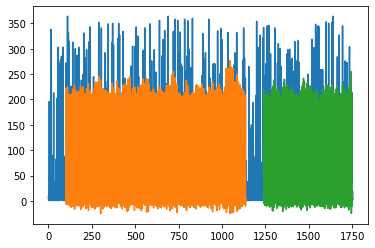

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)


615

In [29]:

x_input=test_data[515:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.5274725274725275,
 0.005494505494505495,
 0.01098901098901099,
 0.008241758241758242,
 0.045273351648351653,
 0.5796703296703297,
 0.005494505494505495,
 0.005494505494505495,
 0.01098901098901099,
 0.03958104395604396,
 0.7802197802197803,
 0.008241758241758242,
 0.013736263736263738,
 0.01098901098901099,
 0.03661538461538462,
 0.7637362637362638,
 0.008241758241758242,
 0.016483516483516484,
 0.005494505494505495,
 0.03910879120879121,
 0.8983516483516484,
 0.0027472527472527475,
 0.016483516483516484,
 0.008241758241758242,
 0.03702472527472528,
 0.3543956043956044,
 0.005494505494505495,
 0.01098901098901099,
 0.005494505494505495,
 0.038027747252747254,
 0.45054945054945056,
 0.005494505494505495,
 0.01098901098901099,
 0.0027472527472527475,
 0.03208379120879121,
 0.271978021978022,
 0.0027472527472527475,
 0.005494505494505495,
 0.008241758241758242,
 0.021429945054945058,
 0.9478021978021979,
 0.0027472527472527475,
 0.008241758241758242,
 0.01098901098901099,
 0.0488222527

In [32]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.6962576]
101
1 day input [0.00549451 0.01098901 0.00824176 0.04527335 0.57967033 0.00549451
 0.00549451 0.01098901 0.03958104 0.78021978 0.00824176 0.01373626
 0.01098901 0.03661538 0.76373626 0.00824176 0.01648352 0.00549451
 0.03910879 0.89835165 0.00274725 0.01648352 0.00824176 0.03702473
 0.3543956  0.00549451 0.01098901 0.00549451 0.03802775 0.45054945
 0.00549451 0.01098901 0.00274725 0.03208379 0.27197802 0.00274725
 0.00549451 0.00824176 0.02142995 0.9478022  0.00274725 0.00824176
 0.01098901 0.04882225 0.64285714 0.00549451 0.01098901 0.00274725
 0.03975742 0.51923077 0.00549451 0.00274725 0.00274725 0.03712582
 0.75824176 0.00824176 0.01098901 0.00274725 0.03093599 0.58791209
 0.00549451 0.01373626 0.00824176 0.04488242 0.75       0.00824176
 0.00274725 0.01098901 0.03407637 0.33241758 0.00549451 0.00824176
 0.00549451 0.03296813 0.06318681 0.00274725 0.00824176 0.00824176
 0.04680879 0.83516484 0.00824176 0.01098901 0.00549451 0.03288297
 0.01373626 0.00274725 0.         

11 day output [[-0.02394742]]
12 day input [ 0.01373626  0.01098901  0.03661538  0.76373626  0.00824176  0.01648352
  0.00549451  0.03910879  0.89835165  0.00274725  0.01648352  0.00824176
  0.03702473  0.3543956   0.00549451  0.01098901  0.00549451  0.03802775
  0.45054945  0.00549451  0.01098901  0.00274725  0.03208379  0.27197802
  0.00274725  0.00549451  0.00824176  0.02142995  0.9478022   0.00274725
  0.00824176  0.01098901  0.04882225  0.64285714  0.00549451  0.01098901
  0.00274725  0.03975742  0.51923077  0.00549451  0.00274725  0.00274725
  0.03712582  0.75824176  0.00824176  0.01098901  0.00274725  0.03093599
  0.58791209  0.00549451  0.01373626  0.00824176  0.04488242  0.75
  0.00824176  0.00274725  0.01098901  0.03407637  0.33241758  0.00549451
  0.00824176  0.00549451  0.03296813  0.06318681  0.00274725  0.00824176
  0.00824176  0.04680879  0.83516484  0.00824176  0.01098901  0.00549451
  0.03288297  0.01373626  0.00274725  0.          0.01098901  0.
  0.29120879  0.002747

  0.59439445 -0.02305078  0.0054141   0.0099356 ]
24 day output [[0.07193428]]
25 day input [ 0.3543956   0.00549451  0.01098901  0.00549451  0.03802775  0.45054945
  0.00549451  0.01098901  0.00274725  0.03208379  0.27197802  0.00274725
  0.00549451  0.00824176  0.02142995  0.9478022   0.00274725  0.00824176
  0.01098901  0.04882225  0.64285714  0.00549451  0.01098901  0.00274725
  0.03975742  0.51923077  0.00549451  0.00274725  0.00274725  0.03712582
  0.75824176  0.00824176  0.01098901  0.00274725  0.03093599  0.58791209
  0.00549451  0.01373626  0.00824176  0.04488242  0.75        0.00824176
  0.00274725  0.01098901  0.03407637  0.33241758  0.00549451  0.00824176
  0.00549451  0.03296813  0.06318681  0.00274725  0.00824176  0.00824176
  0.04680879  0.83516484  0.00824176  0.01098901  0.00549451  0.03288297
  0.01373626  0.00274725  0.          0.01098901  0.          0.29120879
  0.00274725  0.00549451  0.00274725  0.05089615  0.14285714  0.00274725
  0.01098901  0.00549451  0.0513

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
import matplotlib.pyplot as plt
len(df1)

1755

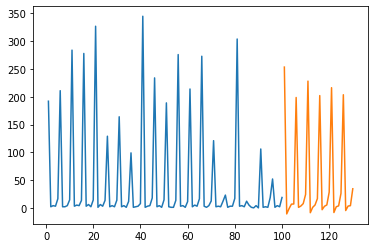

In [35]:
plt.plot(day_new,scaler.inverse_transform(df1[1655:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

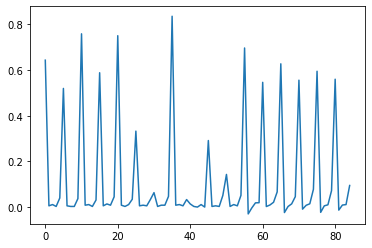

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1700:])

In [37]:
len(ytest)

514

Text(0, 0.5, 'travel times')

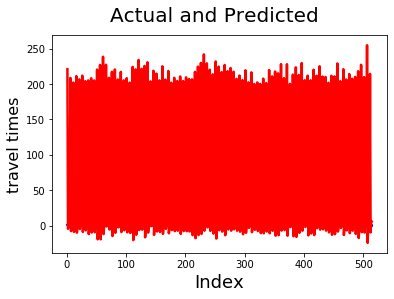

In [38]:
#Actual vs Predicted
c = [i for i in range(1,515,1)]
fig = plt.figure()
plt.plot(c,ytest, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,test_predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('travel times', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

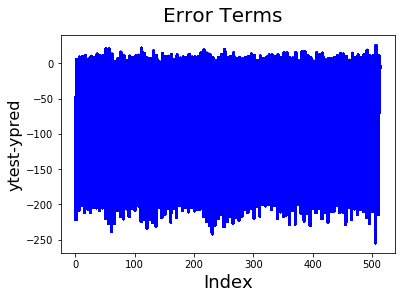

In [39]:
# Error terms
c = [i for i in range(1,515,1)]
fig = plt.figure()
plt.plot(c,ytest-test_predict, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label